In [1]:
%load_ext autoreload
%autoreload 2
import argparse
# from deepsea import DeepSea
# from deepsea_dqn_agent import DeepseaDQNAgent
# from deepsea_deep_exp_agent import DeepseaDeepExpAgent
# from tqdm import tqdm_notebook
import numpy as np
from typing import List, Dict
import uuid
import matplotlib.pyplot as plt
import pandas as pd
from multiprocessing import Pool
import copy
from tensorboardX import SummaryWriter

In [2]:
print(np.load('supervised_experiment_5_7_0_0.npy'))

{'supervised_5_7_0': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

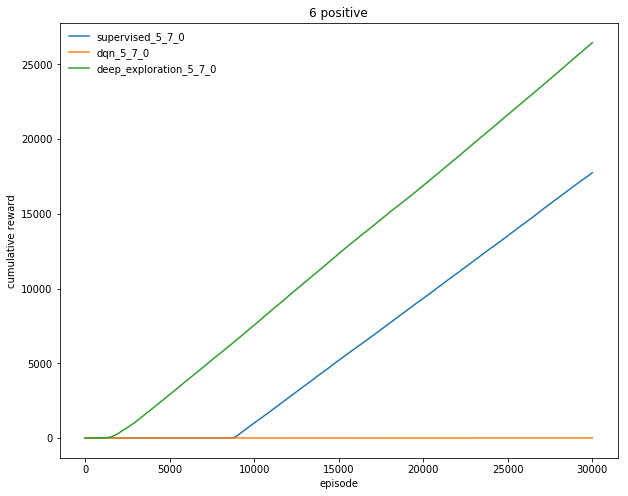

In [6]:
histories_mapped = {}

n = 5
k = 2
r = 0

for i in range(10):
    histories = np.load('supervised_experiment_{}_{}_{}_{}.npy'.format(n, n + k, r))
    # supervised_histories = np.load('supervised_experiment_{}_{}_{}_0.npy'.format(n, n + k, 0))

    for name, h in dict(histories.tolist()).items():
        if name not in histories_mapped:
            histories_mapped[name] = [h]
        else:
            histories_mapped[name].append(h)

plt.figure(figsize=(10,8))
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.title('5 positive, 2 negative')
for name, history in histories_mapped.items():
    raw = np.cumsum(np.array(history), axis=1)
    mean_raw = np.mean(raw, axis=0)
    std = np.sqrt(np.var(raw, axis=0))
    time_series_df = pd.DataFrame(mean_raw)
    std_df = pd.DataFrame(std)
    plt.plot(time_series_df.index, mean_raw, label=name)
    plt.fill_between(time_series_df.index, mean_raw + std / 10, mean_raw - std / 10, alpha=0.2)

plt.legend(loc='upper left', frameon=False)
# plt.savefig('exploit_collision_comparison.png')
plt.show()

In [2]:
histories_mapped = {}

for i in range(10):
    histories = np.load('./deep_exp_prior_1_10_epi_40/supervised_experiment_50_50_{}.npy'.format(i))
    # supervised_histories = np.load('supervised_experiment_{}_{}_{}_0.npy'.format(n, n + k, 0))

    for name, h in dict(histories.tolist()).items():
        if name not in histories_mapped:
            histories_mapped[name] = [h]
        else:
            histories_mapped[name].append(h)

plt.figure(figsize=(10,8))
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.title('10 units 5 candidates for each')
for name, history in histories_mapped.items():
    raw = np.cumsum(np.array(history), axis=1)
    mean_raw = np.mean(raw, axis=0)
    std = np.sqrt(np.var(raw, axis=0))
    time_series_df = pd.DataFrame(mean_raw)
    std_df = pd.DataFrame(std)
    plt.plot(time_series_df.index, mean_raw, label=name)
    plt.fill_between(time_series_df.index, mean_raw + std / 10, mean_raw - std / 10, alpha=0.2)

plt.legend(loc='upper left', frameon=False)
# plt.savefig('exploit_collision_comparison.png')
plt.show()

ValueError: Object arrays cannot be loaded when allow_pickle=False

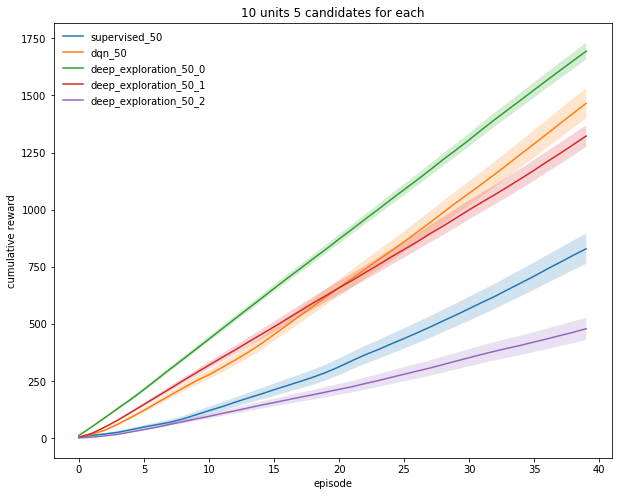

In [3]:
histories_mapped = {}

for i in range(10):
    histories = np.load('./deep_exp_prior_1_10_epi_40/supervised_experiment_50_50_{}.npy'.format(i), allow_pickle=True)
    # supervised_histories = np.load('supervised_experiment_{}_{}_{}_0.npy'.format(n, n + k, 0))

    for name, h in dict(histories.tolist()).items():
        if name not in histories_mapped:
            histories_mapped[name] = [h]
        else:
            histories_mapped[name].append(h)

plt.figure(figsize=(10,8))
plt.xlabel('episode')
plt.ylabel('cumulative reward')
plt.title('10 units 5 candidates for each')
for name, history in histories_mapped.items():
    raw = np.cumsum(np.array(history), axis=1)
    mean_raw = np.mean(raw, axis=0)
    std = np.sqrt(np.var(raw, axis=0))
    time_series_df = pd.DataFrame(mean_raw)
    std_df = pd.DataFrame(std)
    plt.plot(time_series_df.index, mean_raw, label=name)
    plt.fill_between(time_series_df.index, mean_raw + std / 10, mean_raw - std / 10, alpha=0.2)

plt.legend(loc='upper left', frameon=False)
# plt.savefig('exploit_collision_comparison.png')
plt.show()